In [2]:
import gmaps
import pandas as pd
from api_keys import gkey
from datetime import date
import calendar
import scipy.stats as stats
from matplotlib import pyplot as plt
import statistics

# Seattle 

Text(0.5, 0, 'Day')

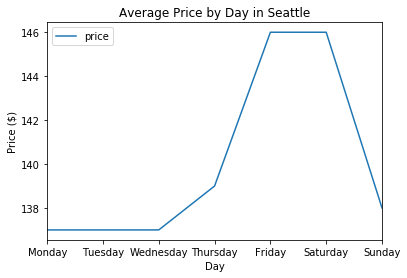

In [38]:
#Import Seattle file
file = 'Seattle_Master_Df.csv'

seattle = pd.read_csv(file)
del seattle['Unnamed: 0']

#Create column for day of week
seattle['date'] =  pd.to_datetime(seattle['date'], format='%Y-%m')
seattle['day'] = seattle['date'].dt.day_name()
seattle = seattle[['listing_id', 'date', 'price', 'year','City','latitude', 'longitude', 'property_type', 'review_scores_rating', 'day']]


#Evaluate price by day of week
Seattle_day_df = seattle.groupby(['City','day'])['price'].mean().round()
Seattle_day_df = pd.DataFrame(Seattle_day_df).reset_index()
dict = {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}
Seattle_day_df['order'] = Seattle_day_df['day'].map(dict)
Seattle_day_df = Seattle_day_df.sort_values('order')
del Seattle_day_df['order']
fig = Seattle_day_df.set_index('day').plot(kind='line',title = 'Average Price by Day in Seattle')
fig.set_ylabel('Price ($)')
fig.set_xlabel('Day')

In [14]:
seattle['month'] = seattle['date'].dt.month


,listing_id,date,price,year,City,latitude,longitude,property_type,review_scores_rating,day,month
0,5682,2016-01-11,50.0,2016,Seattle,47.52398,-122.359891,Apartment,96.0,Monday,1
1,5682,2016-01-12,50.0,2016,Seattle,47.52398,-122.359891,Apartment,96.0,Tuesday,1
2,5682,2016-01-13,50.0,2016,Seattle,47.52398,-122.359891,Apartment,96.0,Wednesday,1
3,5682,2016-01-14,50.0,2016,Seattle,47.52398,-122.359891,Apartment,96.0,Thursday,1
4,5682,2016-01-15,50.0,2016,Seattle,47.52398,-122.359891,Apartment,96.0,Friday,1


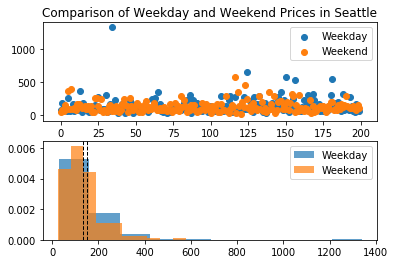

In [6]:
#slice dataframe into weekdays and weekends

seattle_weekdays = seattle[seattle['day'].isin(['Monday','Tuesday','Wednesday','Thursday','Sunday'])]
seattle_weekends = seattle[seattle['day'].isin(['Friday','Saturday'])]
                  
seattle_weekdays = seattle_weekdays[['listing_id','day','price']]
seattle_weekdays = seattle_weekdays.groupby(['listing_id','day'])['price'].mean()
seattle_weekdays = pd.DataFrame(seattle_weekdays).reset_index()

seattle_weekends = seattle_weekends[['listing_id','day','price']]
seattle_weekends = seattle_weekends.groupby(['listing_id','day'])['price'].mean()
seattle_weekends = pd.DataFrame(seattle_weekends).reset_index()

#create two random samples of equal size. Set random_state to 1 to keep consistent results
seattle_weekday_sample = seattle_weekdays.sample(200, random_state=1)
seattle_weekend_sample = seattle_weekends.sample(200, random_state=1)

#create scatter plot and histogram to observe random samples
plt.subplot(2, 1, 1)
plt.scatter(range(len(seattle_weekday_sample)), seattle_weekday_sample.price, label="Weekday");
plt.scatter(range(len(seattle_weekend_sample)), seattle_weekend_sample.price, label="Weekend");
plt.legend()
plt.title('Comparison of Weekday and Weekend Prices in Seattle')

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(seattle_weekday_sample.price, density=True, alpha=0.7, label="Weekday");
plt.hist(seattle_weekend_sample.price,density=True, alpha=0.7, label="Weekend");
plt.axvline(seattle_weekday_sample.price.mean(), color='k', linestyle='dashed', linewidth=1);
plt.axvline(seattle_weekend_sample.price.mean(), color='k', linestyle='dashed', linewidth=1);
plt.savefig('Seattle Images/Comparison of Weekday and Weekend Prices in Seattle')

plt.legend()   
plt.show()

Conduct independent T-Test for weekend and weekday values. 
Ho: The mean of Friday and Saturday prices are equal to the means of the rest of the week
Ha: There is a difference between the means of Fri/Sat and weekday rates


P-value is greater than 0.05 so we fail to reject the Ho.

In [7]:
stats.ttest_ind(seattle_weekday_sample.price, seattle_weekend_sample.price, equal_var=False)

Ttest_indResult(statistic=1.4410895668959465, pvalue=0.15049616670087604)

In [19]:
map_df = seattle[seattle['property_type'].isin(['House','Apartment','Condominium'])]
#Setup google maps
gmaps.configure(api_key = gkey)
layout = {'width': '400px',
         'height': '400px',
         'border': '1px solid black' ,
         'padding':'1px' 
         }
#2016 Heatmap
fig2016 = gmaps.figure(layout = layout)
# Store latitude and longitude in locations
heatmap_2016 = map_df[map_df['year']==2016]
locations2016 = heatmap_2016[["latitude", "longitude"]]

# rating2016 = heatmap_2016['review_scores_rating']
price2016 = heatmap_2016['price']

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations2016, weights=price2016, 
                                 dissipating=True, max_intensity=100,
                                 point_radius=2)


# Add layer
fig2016.add_layer(heat_layer)

# Display figure
fig2016


Figure(layout=FigureLayout(border='1px solid black', height='400px', padding='1px', width='400px'))

In [9]:
#2017 Heatmap
fig2017 = gmaps.figure(layout = layout)
# Store latitude and longitude in locations
heatmap_2017 = map_df[map_df['year']==2017]
locations2017 = heatmap_2017[["latitude", "longitude"]]

# rating2017 = heatmap_2017['review_scores_rating']
price2017 = heatmap_2017['price']


# Create heat layer
heat_layer_2017 = gmaps.heatmap_layer(locations2017, weights=price2017, 
                                 dissipating=True, max_intensity=100,
                                 point_radius=2)


# Add layer
fig2017.add_layer(heat_layer_2017)

# Display figure
fig2017

Figure(layout=FigureLayout(border='1px solid black', height='400px', padding='1px', width='400px'))

In [ ]:
# Get Seattle data for 2016 use

Homes_2016 = map_df[(map_df['property_type'] == "House") & (map_df['year']==2016)]
homes_df_2016 = Homes_2016[['latitude','longitude']]
apt_2016 = map_df[(map_df['property_type'] == "Apartment") & (map_df['year']==2016)]
apt_df_2016 = apt_2016[['latitude','longitude']]
condo_2016 = map_df[(map_df['property_type'] == 'Condominium') & (map_df['year']==2016)]
condo_df_2016 = condo_2016[['latitude','longitude']]

homes_layer_2016 = gmaps.symbol_layer(
    homes_df_2016,fill_color = 'rgba(0,150,0,0.4)',
    stroke_color = 'rgba(0,150,0,0.4)',scale = 2)

apt_layer_2016 = gmaps.symbol_layer(
    apt_df_2016,fill_color = 'rgba(200,0,0,0.4)',
    stroke_color = 'rgba(200,0,0,0.4)',scale = 2)

condo_layer_2016 = gmaps.symbol_layer(
    condo_df_2016,fill_color = 'rgba(9,24,220,0.4)',
    stroke_color = 'rgba(9,24,220,0.4)',scale = 2)

fig1_2016 = gmaps.figure(layout = layout)
fig2_2016 = gmaps.figure(layout = layout)
fig3_2016 = gmaps.figure(layout = layout)

fig1_2016.add_layer(homes_layer_2016)
fig2_2016.add_layer(apt_layer_2016)
fig3_2016.add_layer(condo_layer_2016)

fig1_2016

In [ ]:
fig2_2016

In [ ]:
fig3_2016

In [ ]:
# Get Seattle data for 2017 use

Homes_2017 = map_df[(map_df['property_type'] == "House") & (map_df['year']==2017)]
homes_df_2017 = Homes_2016[['latitude','longitude']]
apt_2017 = map_df[(map_df['property_type'] == "Apartment") & (map_df['year']==2017)]
apt_df_2017 = apt_2016[['latitude','longitude']]
condo_2017 = map_df[(map_df['property_type'] == 'Condominium') & (map_df['year']==2017)]
condo_df_2017 = condo_2016[['latitude','longitude']]

homes_layer_2017 = gmaps.symbol_layer(
    homes_df_2017,fill_color = 'rgba(0,150,0,0.4)',
    stroke_color = 'rgba(0,150,0,0.4)',scale = 2)

apt_layer_2017 = gmaps.symbol_layer(
    apt_df_2017,fill_color = 'rgba(200,0,0,0.4)',
    stroke_color = 'rgba(200,0,0,0.4)',scale = 2)

condo_layer_2017 = gmaps.symbol_layer(
    condo_df_2017,fill_color = 'rgba(9,24,220,0.4)',
    stroke_color = 'rgba(9,24,220,0.4)',scale = 2)

fig1_2017 = gmaps.figure(layout = layout)
fig2_2017 = gmaps.figure(layout = layout)
fig3_2017 = gmaps.figure(layout = layout)

fig1_2017.add_layer(homes_layer_2017)
fig2_2017.add_layer(apt_layer_2017)
fig3_2017.add_layer(condo_layer_2017)

fig1_2017


In [ ]:
fig2_2017

In [ ]:
fig3_2017

# Boston Data

In [8]:
file = 'Boston_Master_DF.csv'

boston = pd.read_csv(file)
grouped = boston.groupby(['year','listing_id'])
del boston['Unnamed: 0']
mean_grouped = pd.DataFrame(grouped['review_scores_rating'].mean())

mean_grouped.dropna(how = 'any',inplace = True)
mean_grouped = mean_grouped.reset_index()

boston['date'] =  pd.to_datetime(boston['date'], format='%Y-%m-%d')
boston['day'] = boston['date'].dt.day_name()


In [ ]:
boston = boston[['listing_id', 'date', 'price', 'year',
       'latitude', 'longitude', 'property_type', 'review_scores_rating', 'City', 'day']]

Boston_day_df = boston.groupby(['City','day'])['price'].mean().round()
Boston_day_df = pd.DataFrame(Boston_day_df).reset_index()

dict = {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}
Boston_day_df['order'] = Boston_day_df['day'].map(dict)

Boston_day_df = Boston_day_df.sort_values('order')
del Boston_day_df['order']

Boston_fig = Boston_day_df.set_index('day')
Boston_fig.plot(kind='line',title = 'Average Price by Day in Boston')
# Boston_fig.set_ylabel('Price ($)')
# Boston_fig.set_xlabel('Day')

# Plot Comparison of Boston and Seattle prices by day of week

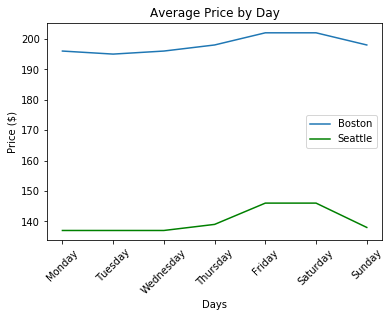

In [37]:
Boston_x = Boston_day_df['day']
Boston_y = Boston_day_df['price']
Seattle_x = Seattle_day_df['day']
Seattle_y = Seattle_day_df['price']

plt.plot(Boston_x,Boston_y,label = "Boston")
plt.plot(Seattle_x,Seattle_y, color = 'g',label = 'Seattle')

plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Average Price by Day')
plt.xticks(rotation = 45)
plt.legend(loc = 'best')
plt.savefig('Boston_Seattle_avg_price_day')
plt.show()

# Independant Ttest to evaluate daily prices between Seattle and Boston

In [44]:
stats.ttest_ind(Boston_day_df.price, Seattle_day_df.price, equal_var=False)

Ttest_indResult(statistic=30.477416183073355, pvalue=1.10874112138463e-11)

In [40]:
#slice dataframe into weekdays and weekends

Boston_weekdays = boston[boston['day'].isin(['Monday','Tuesday','Wednesday','Thursday','Sunday'])]
Boston_weekends = boston[boston['day'].isin(['Friday','Saturday'])]
                  
Boston_weekdays = Boston_weekdays[['listing_id','day','price']]
Boston_weekdays = Boston_weekdays.groupby(['listing_id','day'])['price'].mean()
Boston_weekdays = pd.DataFrame(Boston_weekdays).reset_index()

Boston_weekends = Boston_weekends[['listing_id','day','price']]
Boston_weekends = Boston_weekends.groupby(['listing_id','day'])['price'].mean()
Boston_weekends = pd.DataFrame(Boston_weekends).reset_index()

Boston_weekday = round(Boston_weekdays['price'].mean(),0)
Boston_weekend = round(Boston_weekends['price'].mean(),0)

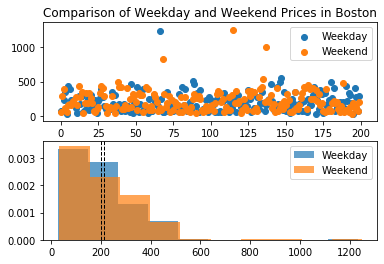

In [42]:
#create two random samples of equal size. Set random_state to 1 to keep consistent results
Boston_weekday_sample = Boston_weekdays.sample(200, random_state=1)
Boston_weekend_sample = Boston_weekends.sample(200, random_state=1)

#create scatter plot and histogram to observe random samples
plt.subplot(2, 1, 1)
plt.scatter(range(len(Boston_weekday_sample)), Boston_weekday_sample.price, label="Weekday");
plt.scatter(range(len(Boston_weekend_sample)), Boston_weekend_sample.price, label="Weekend");
plt.legend()
plt.title('Comparison of Weekday and Weekend Prices in Boston')

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(Boston_weekday_sample.price, density=True, alpha=0.7, label="Weekday");
plt.hist(Boston_weekend_sample.price,density=True, alpha=0.7, label="Weekend");
plt.axvline(Boston_weekday_sample.price.mean(), color='k', linestyle='dashed', linewidth=1);
plt.axvline(Boston_weekend_sample.price.mean(), color='k', linestyle='dashed', linewidth=1);
plt.savefig('Boston Images/Comparison of Weekday and Weekend Prices in Boston')

plt.legend()   
plt.show()



In [89]:
money = boston[boston.price > 6000]
latitude = money.latitude.values[0]
longitude = money.longitude.values[0]
price = money.price.values[0]

money

,listing_id,date,price,year,latitude,longitude,property_type,review_scores_rating,City,day
57265,447826,2016-10-26,7163.0,2016,42.317134,-71.10966,House,96.0,Boston,Wednesday


In [78]:
#Find the most expensive listing in Boston

Boston_high_roller = gmaps.marker_layer(money[['latitude','longitude']])

fig1 = gmaps.figure(layout = layout)


fig1.add_layer(Boston_high_roller)
fig1

Figure(layout=FigureLayout(border='1px solid black', height='400px', padding='1px', width='400px'))